# Linear Regression

`Linear Regression` is a supervised machine learning algorithm where the predicted output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- **Simple regression** - only one independent variable (e.g. sales)
- **Multiple regression** - more than one independent variables (e.g. sales, price)

## Simple Linear Regression

Simple linear regression is an approach for predicting a `response` using a single feature. It is assumed that the two variables are `linearly related`. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load the data tips from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

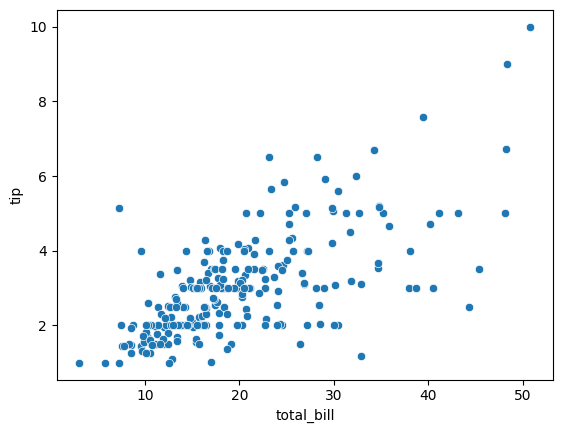

In [4]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [5]:
# split the data into X and y
X = df[['total_bill']]
# scalar = MinMaxScaler()
# X = scalar.fit_transform(X)
y = df['tip']

In [6]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# call the model
model = LinearRegression()

In [8]:
# train the model
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

0.9145959623879678
[0.10397375]
y =  0.9145959623879678 + [0.10397375] * X


In [11]:
model.predict([[5]])

c:\Users\nauma\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.43446472])

In [10]:
# predict
y_pred = model.predict(X_test)

In [12]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.7832203522087186
R2 =  0.4193074194115859
RMSE =  0.8849973741253239


`MES` : A lower MSE indicates better predictive performance, as it means that the model's predictions are closer to the actual values.\
`R2`: A higher R2 indicates a better fit of the model to the data.\
`RMSE`: RMSE is sensitive to outliers, as the squared differences amplify the impact of large errors. Like MSE, a lower RMSE indicates better predictive performance.

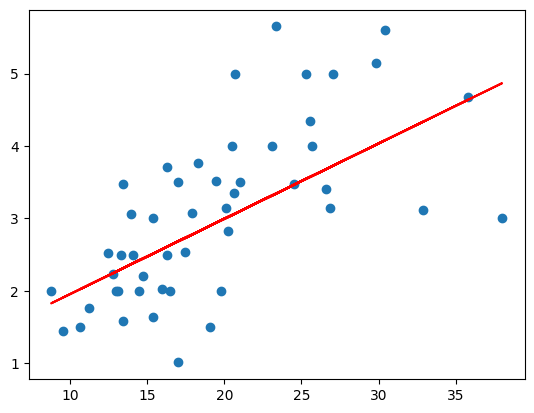

In [13]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

## Polynomial Regression

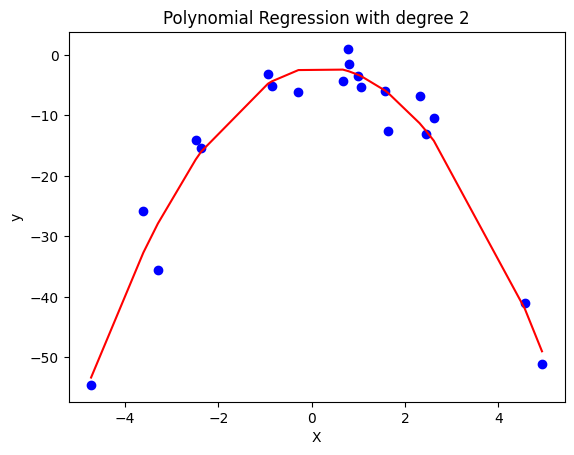

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import operator

# Generate synthetic data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 20)  # Fix the negative signs here

# Reshape for the model
X = X[:, np.newaxis]
y = y[:, np.newaxis]


# Step 2: Polynomial Transformation
degree = 2  # degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Step 3: Train linear regression model
model = LinearRegression()
model.fit(X_poly, y)
y_poly_pred = model.predict(X_poly)

# Step 4: Plot the results
plt.scatter(X, y, color='b')
sorted_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_poly_pred), key=sorted_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='r')
plt.title('Polynomial Regression with degree ' + str(degree))
plt.xlabel('X')
plt.ylabel('y')
plt.show()